In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [67]:
scaler = StandardScaler()
model = LogisticRegression()
dt = DecisionTreeClassifier(criterion = "entropy", random_state=42)

In [68]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\Social_Network_Ads.csv")

In [69]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [70]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: ylabel='EstimatedSalary'>

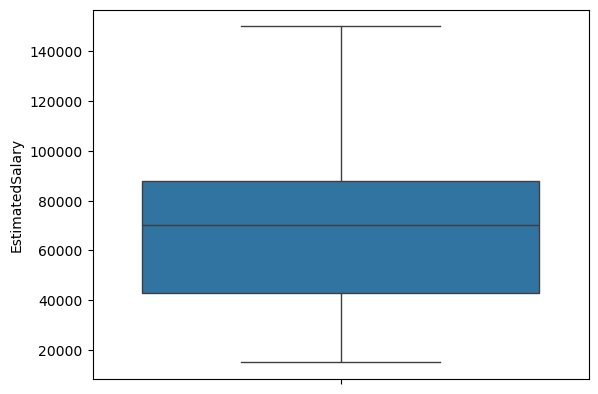

In [71]:
sns.boxplot(df['EstimatedSalary'])

In [72]:
x = df.drop(columns = 'Purchased')
y = df['Purchased']

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 0.3)

In [74]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
logic = model.score(xtestscaled,ytest)

In [75]:
dt.fit(xtrainscaled,ytrain)
decision = dt.score(xtestscaled,ytest)

In [76]:
ypred = pd.DataFrame([[19, 19000]])

In [77]:
pred = model.predict(ypred)[0]
if pred == 1:
    print("Purchased")
else:
    print("Not Purchased")

Purchased


In [78]:
print("Logistic Regression:",logic)
print("DecisionTree Classifier:",decision)

Logistic Regression: 0.8416666666666667
DecisionTree Classifier: 0.8416666666666667


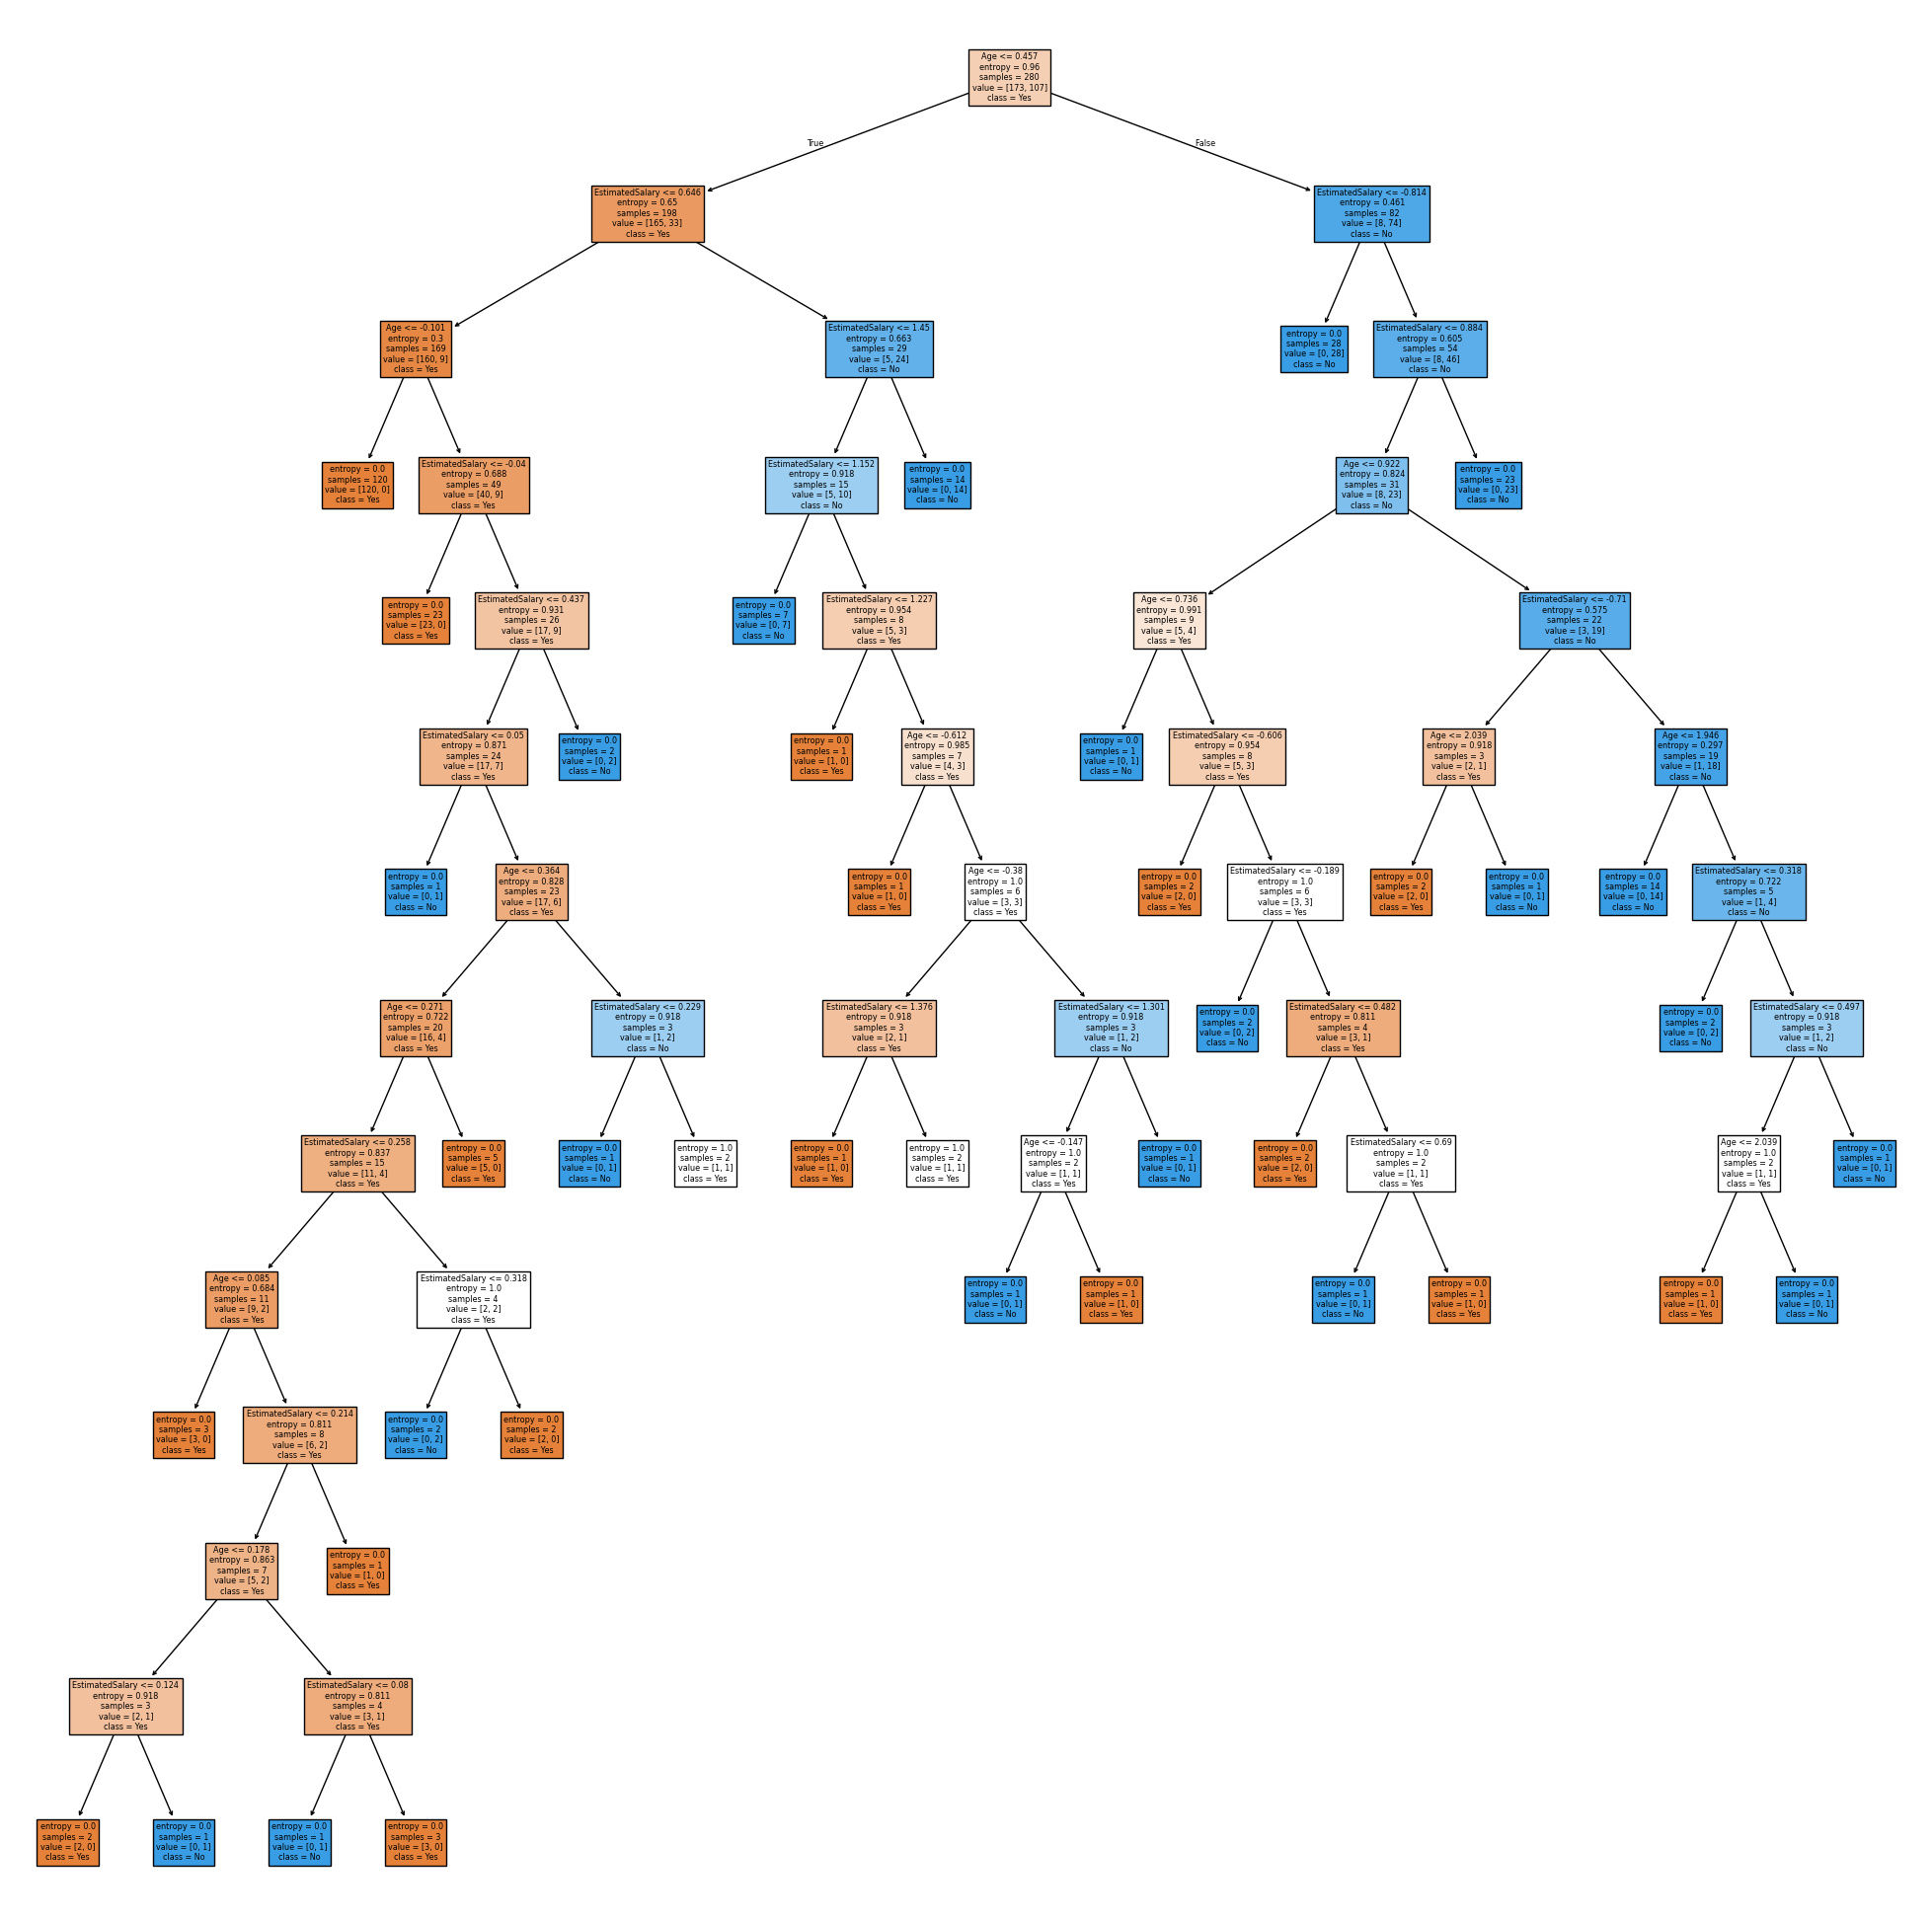

In [86]:
mp.figure(figsize = (25,25))
plot_tree(dt,feature_names = ['Age','EstimatedSalary'], class_names = ['Yes','No'], filled = True)
mp.show()